In [1]:
# Task : Sales Prediction using python
# NAME : YERUVA SRILAXMI
# OASIS INFOBYTE

# Importing necesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset

Advertising_dataset=pd.read_csv("Advertising.csv")

In [3]:
Advertising_dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
Advertising_dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
Advertising_dataset.shape

(200, 5)

In [8]:
# understanding the data variables

Advertising_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
Advertising_dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
Advertising_dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
Advertising_dataset.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

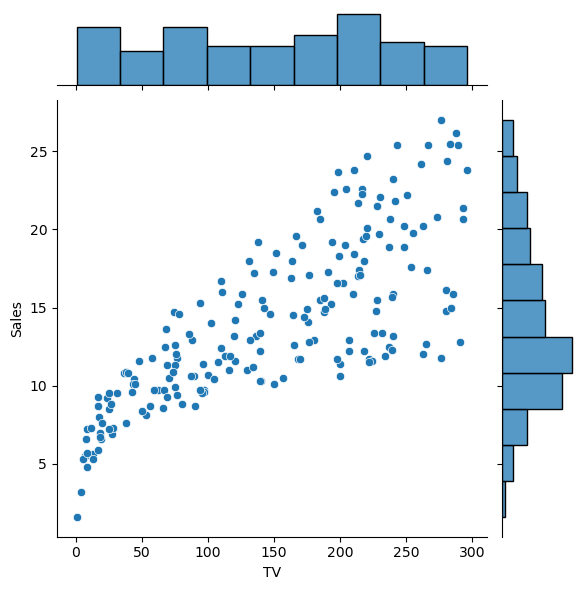

In [20]:
# visualising the columns using joint plot
import seaborn as sn
sns.jointplot(x='TV',y='Sales',data=Advertising_dataset)

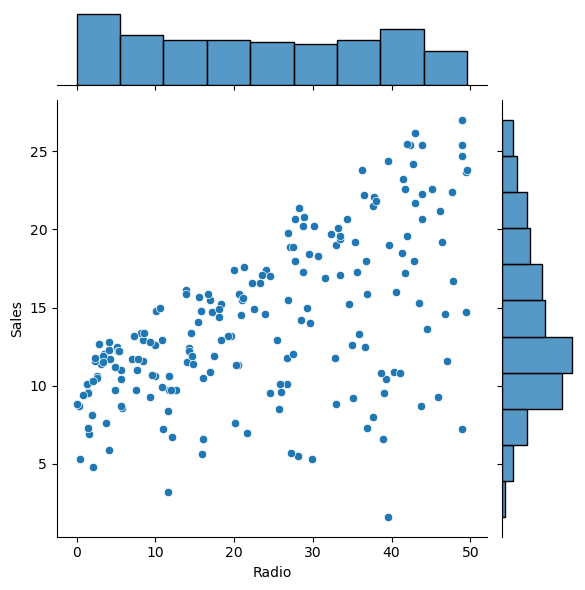

In [21]:
sns.jointplot(x='Radio',y='Sales',data=Advertising_dataset)

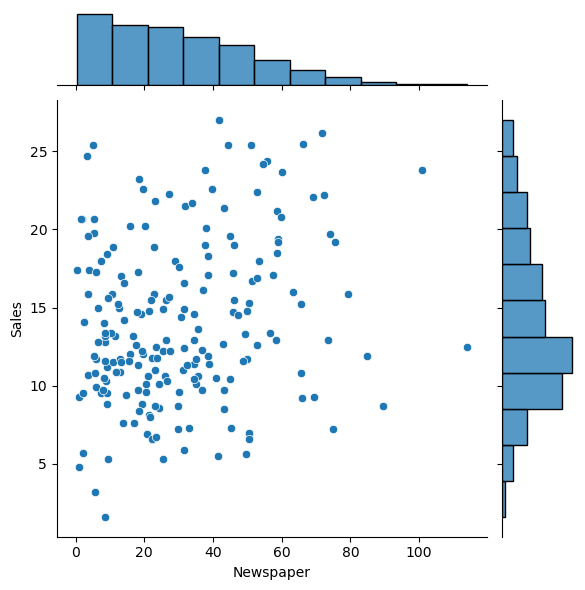

In [23]:
sns.jointplot(x='Newspaper',y='Sales',data=Advertising_dataset)

In [25]:
# finding correlation between variables in data set for plotting heatmap

Advertising_dataset.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


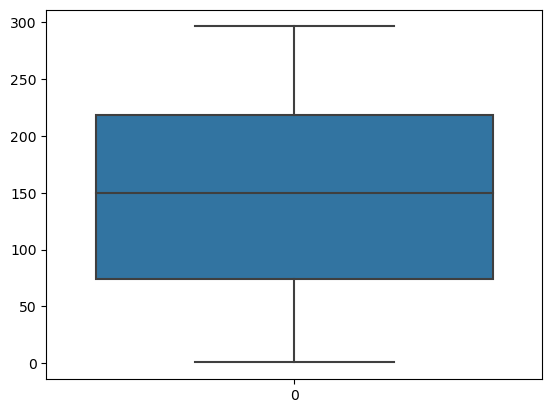

In [28]:
# Outlier analysis

fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(Advertising_dataset['TV'],ax=axs)

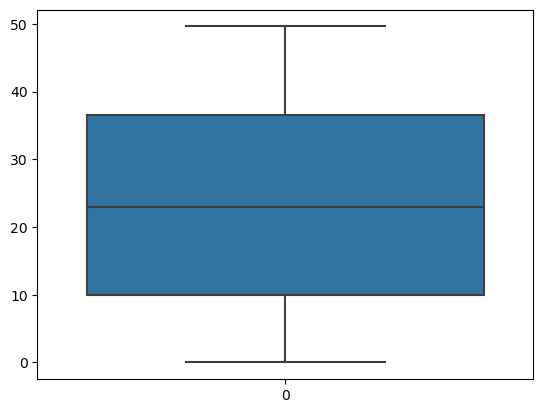

In [29]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(Advertising_dataset['Radio'],ax=axs)

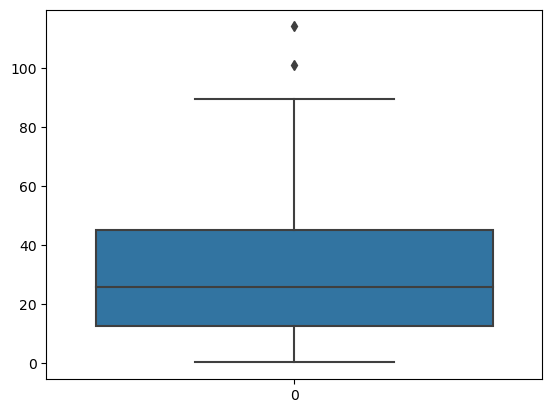

In [30]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(Advertising_dataset['Newspaper'],ax=axs)


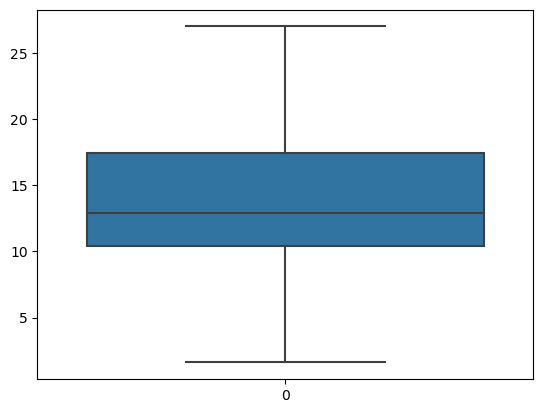

In [31]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(Advertising_dataset['Sales'],ax=axs)


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#First step in building the forecasting model is to identify the Input variables and Output variable

features =Advertising_dataset[['TV', 'Radio', 'Newspaper']]
target =Advertising_dataset[['Sales']]

In [34]:
features

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [35]:
target

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [38]:
# Splitting data for training the model and testing the model

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .8)

# Dimensions of Train and Test Data sets


print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', y_train.shape)
print('Target for test: ', y_test.shape)

Train set of features:  (160, 3)
Test set of features:  (40, 3)
Target for train:  (160, 1)
Target for test:  (40, 1)


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model=LinearRegression()

In [41]:
model

LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [45]:
# predicting the sales
y = model.predict(X_test)
y

array([[15.51269546],
       [11.33035702],
       [22.97268166],
       [19.98486657],
       [12.11757263],
       [18.21823282],
       [20.35605445],
       [ 5.47020709],
       [12.13262253],
       [23.99455512],
       [10.17760717],
       [16.79493711],
       [12.39284668],
       [ 8.86818713],
       [ 8.27749299],
       [14.66142182],
       [21.12896262],
       [12.058739  ],
       [12.65665348],
       [18.73881244],
       [ 6.86513056],
       [19.28329269],
       [21.11870477],
       [20.71577436],
       [ 5.41694057],
       [15.39064921],
       [18.35525488],
       [ 7.9754969 ],
       [10.10529622],
       [14.96682596],
       [17.37289464],
       [14.79478728],
       [17.0953974 ],
       [ 9.7316493 ],
       [ 6.59789063],
       [16.56458923],
       [10.07978816],
       [23.941497  ],
       [12.52408008],
       [18.15587086]])

In [46]:
# Testing the model

from sklearn.metrics import mean_squared_error

In [47]:
mean_squared_error(y, y_test)

2.449787207883756